In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e607495c282c7a2d6823e36d01e1e441


In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | severo-kurilsk
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | mayo
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | wanaka
Processing Record 9 of Set 1 | peterhead
Processing Record 10 of Set 1 | vagur
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | nea playia
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | stornoway
Processing Record 16 of Set 1 | otradnoye
Processing Record 17 of Set 1 | mwinilunga
Processing Record 18 of Set 1 | port lincoln
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | nosy varika
Processing Record 21 of Set 1 | komsomolskiy
Processing Record 22 of Set 1 | grand river sout

Processing Record 38 of Set 4 | teguldet
Processing Record 39 of Set 4 | meybod
Processing Record 40 of Set 4 | saint george
Processing Record 41 of Set 4 | ballina
Processing Record 42 of Set 4 | bandarbeyla
Processing Record 43 of Set 4 | east london
Processing Record 44 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 45 of Set 4 | carnarvon
Processing Record 46 of Set 4 | ola
Processing Record 47 of Set 4 | flin flon
Processing Record 48 of Set 4 | takaka
Processing Record 49 of Set 4 | mariakani
Processing Record 50 of Set 4 | sotouboua
Processing Record 1 of Set 5 | anju
Processing Record 2 of Set 5 | saint-pierre
Processing Record 3 of Set 5 | belmonte
Processing Record 4 of Set 5 | aswan
Processing Record 5 of Set 5 | gorno-chuyskiy
City not found. Skipping...
Processing Record 6 of Set 5 | khatanga
Processing Record 7 of Set 5 | beloha
Processing Record 8 of Set 5 | novobirilyussy
Processing Record 9 of Set 5 | rungata
City not found. Skipping...
Processin

Processing Record 26 of Set 8 | disna
Processing Record 27 of Set 8 | nhulunbuy
Processing Record 28 of Set 8 | valreas
Processing Record 29 of Set 8 | wuchang
Processing Record 30 of Set 8 | ikeda
Processing Record 31 of Set 8 | kem
Processing Record 32 of Set 8 | paramonga
Processing Record 33 of Set 8 | porto santo
Processing Record 34 of Set 8 | madawaska
Processing Record 35 of Set 8 | ostrovnoy
Processing Record 36 of Set 8 | san cristobal
Processing Record 37 of Set 8 | honggang
Processing Record 38 of Set 8 | tishchenskoye
Processing Record 39 of Set 8 | husavik
Processing Record 40 of Set 8 | qandala
Processing Record 41 of Set 8 | mount gambier
Processing Record 42 of Set 8 | shaunavon
Processing Record 43 of Set 8 | juneau
Processing Record 44 of Set 8 | codrington
Processing Record 45 of Set 8 | lancaster
Processing Record 46 of Set 8 | guerrero negro
Processing Record 47 of Set 8 | auki
Processing Record 48 of Set 8 | wonthaggi
Processing Record 49 of Set 8 | mergui
City n

Processing Record 15 of Set 12 | nouadhibou
Processing Record 16 of Set 12 | ciudad del maiz
Processing Record 17 of Set 12 | saint-augustin
Processing Record 18 of Set 12 | mayuge
Processing Record 19 of Set 12 | zonguldak
Processing Record 20 of Set 12 | cayenne
Processing Record 21 of Set 12 | meihekou
Processing Record 22 of Set 12 | maceio
Processing Record 23 of Set 12 | wattegama
Processing Record 24 of Set 12 | ayame
Processing Record 25 of Set 12 | verkhoyansk
Processing Record 26 of Set 12 | denpasar
Processing Record 27 of Set 12 | khuzhir
Processing Record 28 of Set 12 | poso
Processing Record 29 of Set 12 | ialibu
Processing Record 30 of Set 12 | cape coast
Processing Record 31 of Set 12 | tromso
Processing Record 32 of Set 12 | alta floresta
Processing Record 33 of Set 12 | ribnica
Processing Record 34 of Set 12 | kloulklubed
Processing Record 35 of Set 12 | aksay
Processing Record 36 of Set 12 | gorin
Processing Record 37 of Set 12 | islamkot
Processing Record 38 of Set 

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.08,-159.32,80.60,61,1,10.29,US,2020-04-19 23:40:19
1,Severo-Kurilsk,50.68,156.12,30.97,91,73,9.89,RU,2020-04-19 23:38:47
2,Rikitea,-23.12,-134.97,77.07,67,100,5.99,PF,2020-04-19 23:40:24
3,Albany,42.60,-73.97,59.00,52,90,1.99,US,2020-04-19 23:35:25
4,Mayo,38.89,-76.51,60.01,62,1,11.41,US,2020-04-19 23:40:24
5,Thompson,55.74,-97.86,23.00,79,90,10.29,CA,2020-04-19 23:36:19
6,Wanaka,-44.70,169.15,48.92,55,55,7.18,NZ,2020-04-19 23:40:25
7,Peterhead,57.51,-1.80,41.00,93,0,4.70,GB,2020-04-19 23:40:25
8,Vagur,61.47,-6.81,45.70,85,0,15.48,FO,2020-04-19 23:40:25
9,Puerto Ayora,-0.74,-90.35,81.00,84,86,8.01,EC,2020-04-19 23:40:26


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [14]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2020-04-19 23:40:19,22.08,-159.32,80.60,61,1,10.29
1,Severo-Kurilsk,RU,2020-04-19 23:38:47,50.68,156.12,30.97,91,73,9.89
2,Rikitea,PF,2020-04-19 23:40:24,-23.12,-134.97,77.07,67,100,5.99
3,Albany,US,2020-04-19 23:35:25,42.60,-73.97,59.00,52,90,1.99
4,Mayo,US,2020-04-19 23:40:24,38.89,-76.51,60.01,62,1,11.41
5,Thompson,CA,2020-04-19 23:36:19,55.74,-97.86,23.00,79,90,10.29
6,Wanaka,NZ,2020-04-19 23:40:25,-44.70,169.15,48.92,55,55,7.18
7,Peterhead,GB,2020-04-19 23:40:25,57.51,-1.80,41.00,93,0,4.70
8,Vagur,FO,2020-04-19 23:40:25,61.47,-6.81,45.70,85,0,15.48
9,Puerto Ayora,EC,2020-04-19 23:40:26,-0.74,-90.35,81.00,84,86,8.01


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time

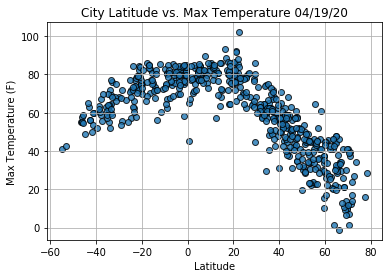

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

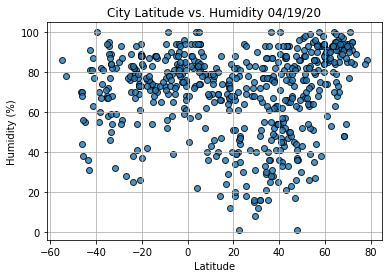

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

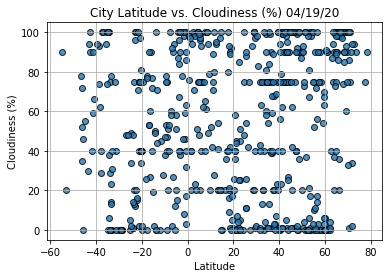

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

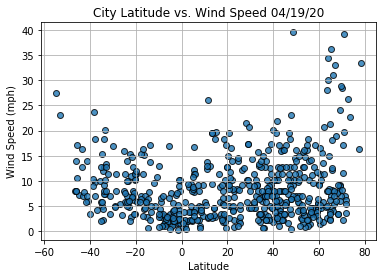

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()